### Titanic survived Project

#### Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

#### Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [128]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [129]:
#read data from github link
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

#### 'Age', 'Cabin' and 'Enbarked' Columns having NULL values

In [131]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Null Values :
'Age'  -  177     ,     
'Cabin'-    687   ,       
'Enbarked'-    2

In [132]:
#unique values in each columns
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### ## Our Target variable 'Survived' is having two catagorical values, so the problem is related to Binary Classification

#### Dropping Columns :
Columns 'PassangerId' is just a serial number and not adding any thing in the data    ,   
Also 'Cabin' column is having lot of Null values and it is not adding any information to the data

In [133]:
data=data.drop(['PassengerId','Cabin'], axis=1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Columns are containing Null values

#### Age column having 177 nulls   ,   
#### Cabin column having 687 nulls 
#### Embarked having 2 null values


In [134]:
age=data[data.Age.isnull()]
age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [135]:
pc=pd.crosstab(data.Pclass, data.Age.isnull(), margins=True)
pc

Age,False,True,All
Pclass,,,
1,186,30,216
2,173,11,184
3,355,136,491
All,714,177,891


Class1  -  30 (13.9 %) out of 216 missing  
Class2  -  11 (6 %) out of 184 missing  
Class3  -  136 (27.7 %) out of 491 missing  
overall -  177 (19.9 %) out of 891 missing  

In [136]:
pc=pd.crosstab(data.Sex, data.Age.isnull(), margins=True)
pc

Age,False,True,All
Sex,,,
female,261,53,314
male,453,124,577
All,714,177,891


Female  - 53 (16.9 %) out of 314 missing   
Male    - 124 (21.5 %) out of 577 missing   
Overall - 177 (19.9 %) out of 891 missing   

### # Imputation

#### 1. Age

We will replace the NaN values with 'Mode'    
Where we will first divide the data according to class and then find Mode of Age for that class and replace it with NaN values

In [137]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [138]:
age=data[data.Pclass.isin([1])]
age.Age.mode()

0    35.0
1    36.0
Name: Age, dtype: float64

In [139]:
age=data[data.Pclass.isin([2])]
age.Age.mode()

0    24.0
1    34.0
Name: Age, dtype: float64

In [140]:
age=data[data.Pclass.isin([3])]
age.Age.mode()

0    22.0
Name: Age, dtype: float64

In [141]:
# Define a function to fill NaN values in 'Age' based on 'Pclass'
def fill_age_based_on_pclass(row):
    age, pclass = row['Age'], row['Pclass']
    if pd.isna(age):
        if pclass == 1:
            return 35
        elif pclass == 2:
            return 24
        elif pclass == 3:
            return 22
    return age

# Apply the function to fill NaN values in 'Age'
data['Age'] = data.apply(fill_age_based_on_pclass, axis=1)

# Display the updated DataFrame
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [142]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [143]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [144]:
data['Embarked'].fillna('S', inplace=True)

In [145]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### So all the Null Values are replaced

### # Encoding the Values in Object data type

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [147]:
!pip install category_encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

In [148]:
lab_enc=LabelEncoder()
df_sex=lab_enc.fit_transform(data['Sex'])
df_Embarked=lab_enc.fit_transform(data['Embarked'])
data['Sex']=pd.Series(df_sex)
data['Embarked']=pd.Series(df_Embarked)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,W./C. 6607,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 62.8+ KB


#### # Now Columns 'Name' and 'Ticket' are only infomative data, these will not add value in our dataset. So we Drop these two columns as well

In [150]:
data=data.drop(['Name','Ticket'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [151]:
data['Survived']=data['Survived'].astype(float)
data['Pclass']=data['Pclass'].astype(float)
data['Sex']=data['Sex'].astype(float)
data['SibSp']=data['SibSp'].astype(float)
data['Parch']=data['Parch'].astype(float)
data['Embarked']=data['Embarked'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [152]:
data.sample(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
405,0.0,2.0,1.0,34.0,1.0,0.0,21.0000,2.0
262,0.0,1.0,1.0,52.0,1.0,1.0,79.6500,2.0
561,0.0,3.0,1.0,40.0,0.0,0.0,7.8958,2.0
787,0.0,3.0,1.0,8.0,4.0,1.0,29.1250,1.0
748,0.0,1.0,1.0,19.0,1.0,0.0,53.1000,2.0
11,1.0,1.0,0.0,58.0,0.0,0.0,26.5500,2.0


#### # Now our data is converted to float64 data type for all columns

### # EDA

In [158]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.632065,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.353617,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


#### Except 'Age' and 'Fare' columns, rest of the columns are having catagorical data

#### Dist plot

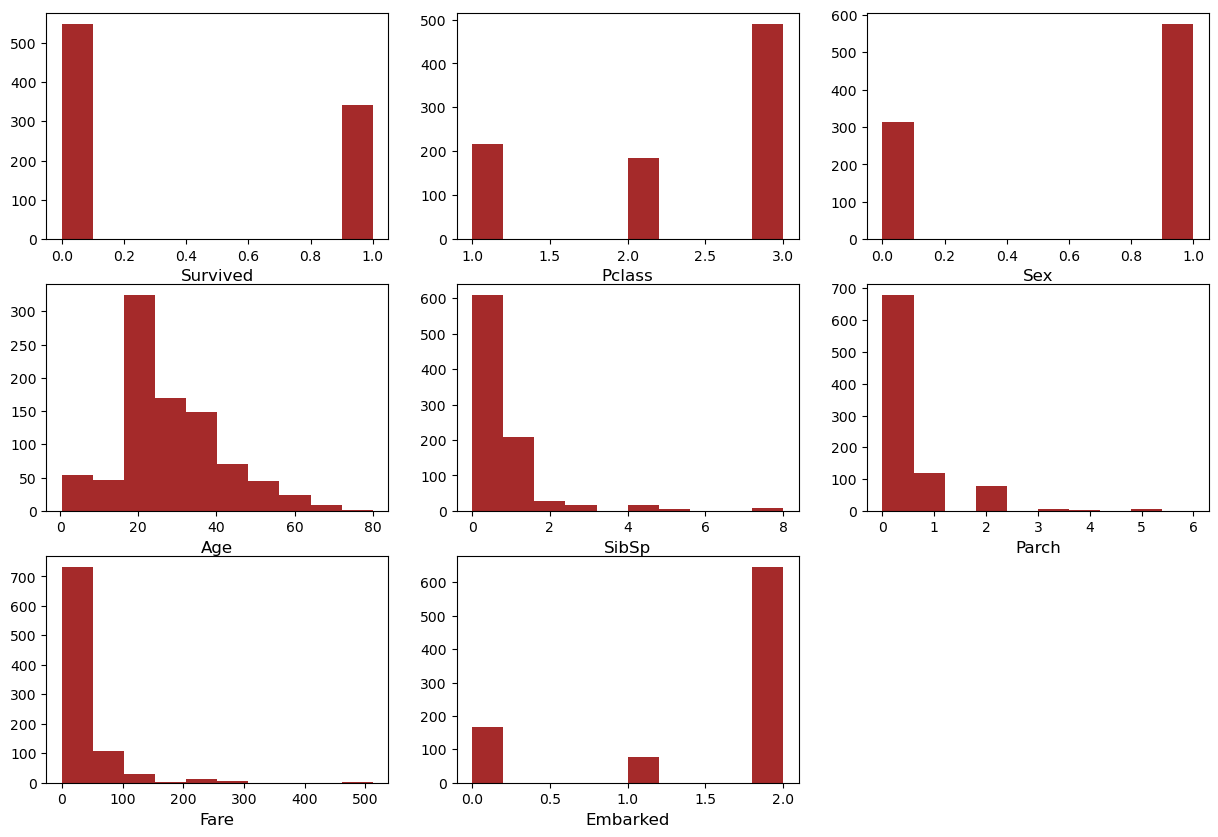

In [179]:
plt.figure(figsize=(15,10))
pltno=1
for column in data:
    if pltno<=8:
        plt.subplot(3,3,pltno)
        plt.hist(x=data[column], color='brown')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()


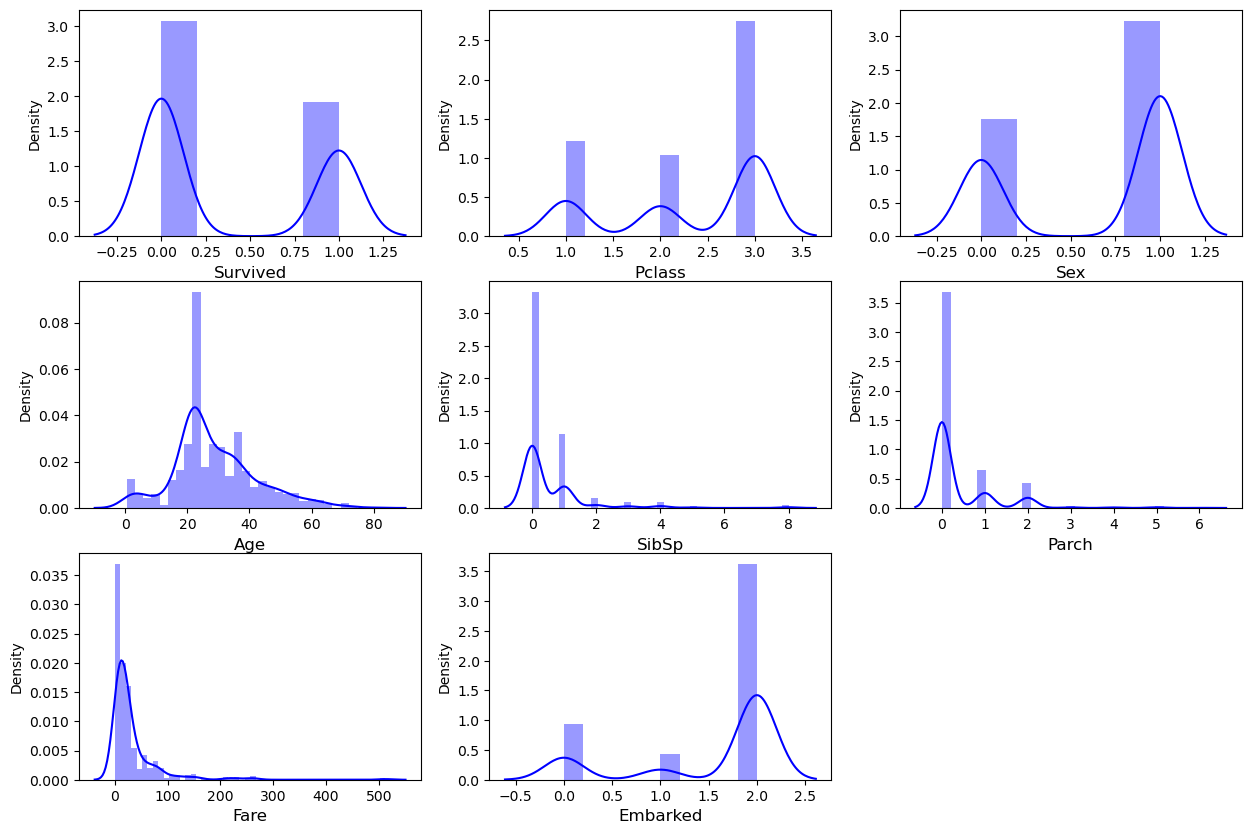

In [182]:
plt.figure(figsize=(15,10))
pltno=1
for column in data:
    if pltno<=8:
        plt.subplot(3,3,pltno)
        sns.distplot(x=data[column], color='blue')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()


#### There is Right skewness in both the columns 'Age' and 'Fare'

#### Box Plot

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.613634
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [197]:
# Removing Skewness from 'Fare' column
temp=data['Fare']
temp=np.power(temp,1/4)
temp.skew()

0.5196788882063811

In [198]:
data['Fare']=temp

In [199]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.613634
SibSp       3.695352
Parch       2.749117
Fare        0.519679
Embarked   -1.264823
dtype: float64

#### Skewness corrected for 'Fare' column, rest of the columns are Not Continious so we will leave them as it is

### # Check for multicolinearity

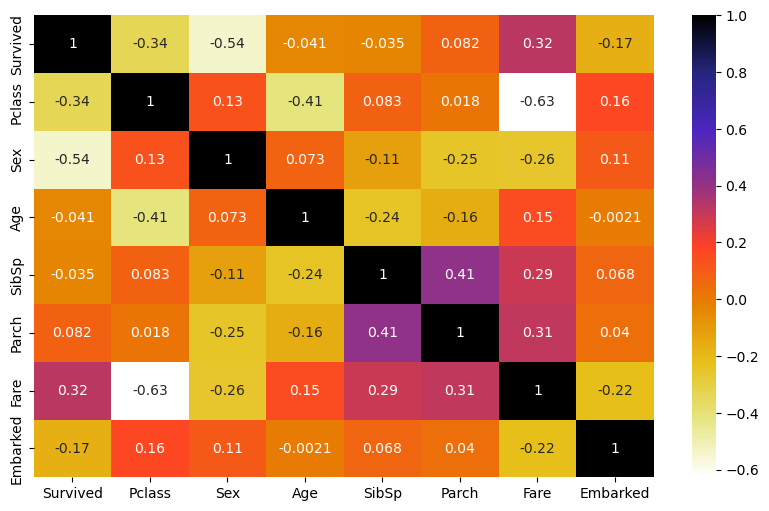

In [212]:
plt.figure(figsize=(10,6))
cor=data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### No multi co-linearity seen in data
#### Also, 'Sex', 'PClass' columns are having good Negative co-relation with Survived column, similarly 'Fare' column is having good Positive co-relation with Survived column

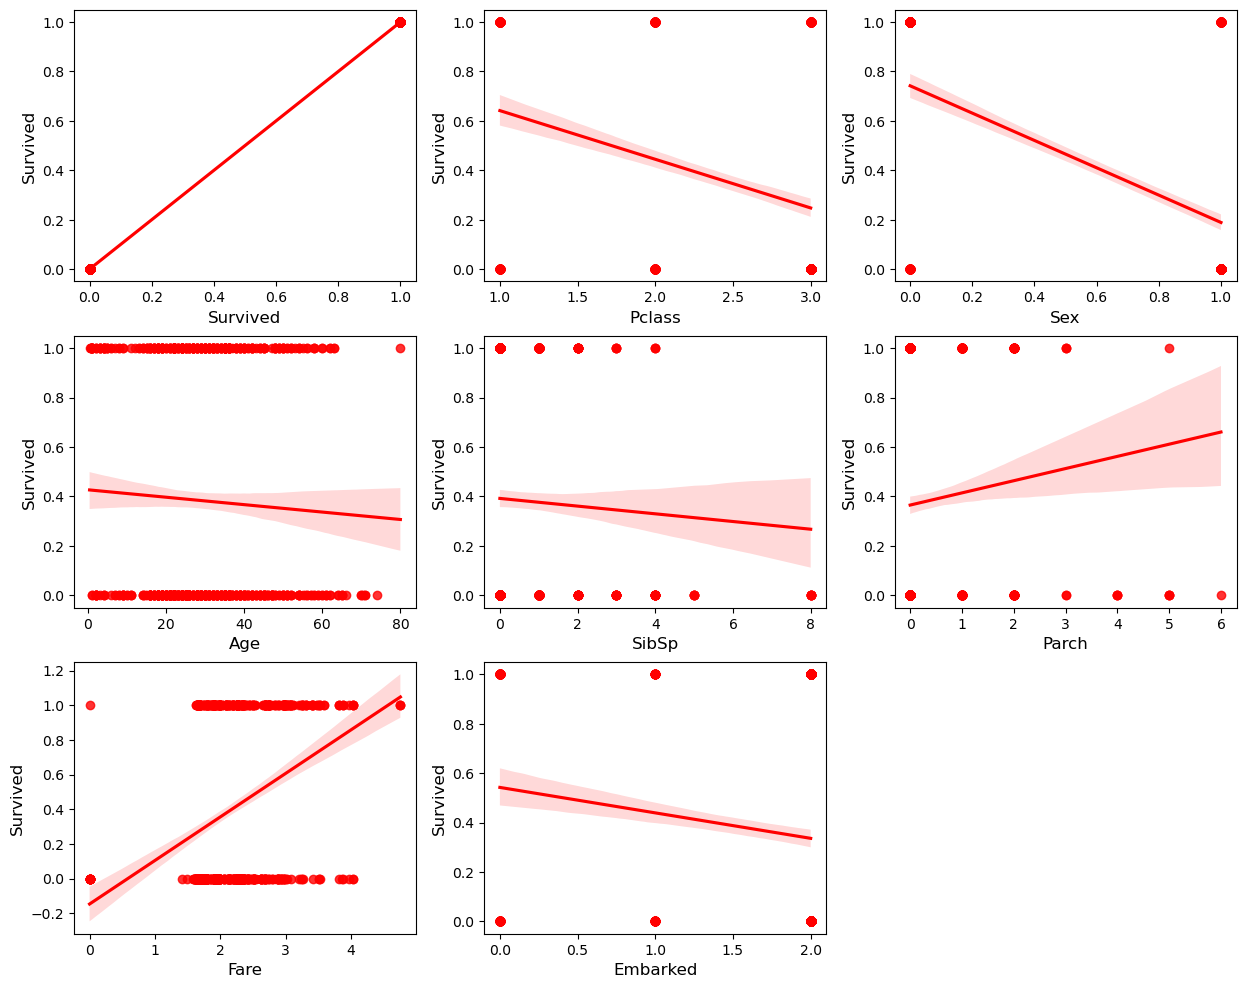

In [209]:
plt.figure(figsize=(15,12))
plotnum=1
for columns in data:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.regplot(data[columns],data['Survived'], color='r')
        plt.xlabel(columns, fontsize=12)
        plt.ylabel('Survived', fontsize=12)
        plotnum+=1
plt.show()

#### Graph shows:
1. Columns 'Pclass','Sex','Age' and 'Embarked' having Negative co-relation with Target variable    
2. Columns 'Parch' and 'Fare' having Positive co-relation with Target variable


### # Model Building

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [218]:
x=data.drop(['Survived'], axis=1)
y=data['Survived']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,1.640909,2.0
1,1.0,0.0,38.0,1.0,0.0,2.905674,0.0
2,3.0,0.0,26.0,0.0,0.0,1.677837,2.0
3,1.0,0.0,35.0,1.0,0.0,2.699440,2.0
4,3.0,1.0,35.0,0.0,0.0,1.684414,2.0


In [222]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,-0.369365,0.737695,-0.122288,-0.474545,-0.473674,-0.344922,0.585954
887,-1.566107,-1.355574,-0.721713,-0.474545,-0.473674,0.365760,0.585954
888,0.827377,-1.355574,-0.496928,0.432793,2.008933,0.140774,0.585954
889,-1.566107,0.737695,-0.197216,-0.474545,-0.473674,0.365760,-1.942303
890,0.827377,0.737695,0.252353,-0.474545,-0.473674,-0.715672,-0.678175


In [228]:
lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max accuracy score : ", maxacc, "   , at Random state : ", maxrs)

Max accuracy score :  0.8834080717488789    , at Random state :  150


#### Max accuracy score is 88.34% at Random State 150

#### Train - Test Split

In [233]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=maxrs)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
342,-0.369365,0.737695,-0.047359,-0.474545,-0.473674,-0.344922,0.585954
106,0.827377,-1.355574,-0.571856,-0.474545,-0.473674,-0.724378,0.585954
92,-1.566107,0.737695,1.301347,0.432793,-0.473674,1.100296,0.585954
548,0.827377,0.737695,0.327281,0.432793,0.767630,0.024741,0.585954
124,-1.566107,0.737695,1.900772,-0.474545,0.767630,1.371251,0.585954


#### # Logistic Regression

In [258]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred_test=lr.predict(x_test)
lr_pred_train=lr.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,lr_pred_test)*100, "%"  )
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,lr_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,lr_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,lr_pred_test))


Accuracy Score for Test data in % :  88.34080717488789 %
Accuracy Score for Train data in % :  77.39520958083833 %

 Confusion Matrix  : 
 [[124  10]
 [ 16  73]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       134
         1.0       0.88      0.82      0.85        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.88       223
weighted avg       0.88      0.88      0.88       223



#### # Decision Tree Classifier

In [259]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,dt_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,dt_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,dt_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,dt_pred_test))

Accuracy Score for Test data in % :  85.20179372197309 %
Accuracy Score for Train data in % :  97.60479041916167 %

 Confusion Matrix  : 
 [[117  17]
 [ 16  73]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       134
         1.0       0.81      0.82      0.82        89

    accuracy                           0.85       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.85      0.85      0.85       223



#### # K Neighbors Classifier

In [260]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,knn_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,knn_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,knn_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,knn_pred_test))

Accuracy Score for Test data in % :  85.65022421524664 %
Accuracy Score for Train data in % :  83.38323353293413 %

 Confusion Matrix  : 
 [[125   9]
 [ 23  66]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.89       134
         1.0       0.88      0.74      0.80        89

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.86      0.85       223



#### # Random Forest Classifier

In [261]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred_test=rf.predict(x_test)
rf_pred_train=rf.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,rf_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,rf_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,rf_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,rf_pred_test))

Accuracy Score for Test data in % :  86.54708520179372 %
Accuracy Score for Train data in % :  97.60479041916167 %

 Confusion Matrix  : 
 [[123  11]
 [ 19  70]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       134
         1.0       0.86      0.79      0.82        89

    accuracy                           0.87       223
   macro avg       0.87      0.85      0.86       223
weighted avg       0.87      0.87      0.86       223



#### # Extra Trees Classifier

In [262]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,et_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,et_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,et_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,et_pred_test))

Accuracy Score for Test data in % :  83.85650224215246 %
Accuracy Score for Train data in % :  97.60479041916167 %

 Confusion Matrix  : 
 [[119  15]
 [ 21  68]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       134
         1.0       0.82      0.76      0.79        89

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



#### # SVC

In [263]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred_test=svc.predict(x_test)
svc_pred_train=svc.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,svc_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,svc_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,svc_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,svc_pred_test))

Accuracy Score for Test data in % :  88.78923766816143 %
Accuracy Score for Train data in % :  82.63473053892216 %

 Confusion Matrix  : 
 [[130   4]
 [ 21  68]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       134
         1.0       0.94      0.76      0.84        89

    accuracy                           0.89       223
   macro avg       0.90      0.87      0.88       223
weighted avg       0.89      0.89      0.89       223



#### # Gradient Boosting Classifier

In [264]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,gb_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,gb_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,gb_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,gb_pred_test))

Accuracy Score for Test data in % :  89.68609865470853 %
Accuracy Score for Train data in % :  89.22155688622755 %

 Confusion Matrix  : 
 [[128   6]
 [ 17  72]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       134
         1.0       0.92      0.81      0.86        89

    accuracy                           0.90       223
   macro avg       0.90      0.88      0.89       223
weighted avg       0.90      0.90      0.90       223



#### # Ada Boost Classifier

In [265]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred_test=ab.predict(x_test)
ab_pred_train=ab.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,ab_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,ab_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,ab_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,ab_pred_test))

Accuracy Score for Test data in % :  87.89237668161435 %
Accuracy Score for Train data in % :  82.03592814371258 %

 Confusion Matrix  : 
 [[123  11]
 [ 16  73]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       134
         1.0       0.87      0.82      0.84        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



#### # Bagging Classifier

In [266]:
bg=BaggingClassifier()
bg.fit(x_train,y_train)
bg_pred_test=bg.predict(x_test)
bg_pred_train=bg.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,bg_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,bg_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,bg_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,bg_pred_test))

Accuracy Score for Test data in % :  86.99551569506725 %
Accuracy Score for Train data in % :  96.7065868263473 %

 Confusion Matrix  : 
 [[123  11]
 [ 18  71]]

 Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       134
         1.0       0.87      0.80      0.83        89

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



### # Cross Validation Score

In [243]:
from sklearn.model_selection import cross_val_score

In [248]:
# Cross Val score for Logistic Regression
cv_score_lr = cross_val_score(lr,X,y,cv=5,scoring='accuracy')
print(cv_score_lr)
print('Mean CV Score : ', cv_score_lr.mean())
print('difference in score  : ', (accuracy_score(y_test,lr_pred_test)-cv_score_lr.mean())*100, "%")

[0.77653631 0.79775281 0.78651685 0.76966292 0.81460674]
Mean CV Score :  0.7890151277383717
difference in score  :  9.439294401050724 %


In [249]:
# Cross Val score for Decision Tree Classifier
cv_score_dt = cross_val_score(dt,X,y,cv=5,scoring='accuracy')
print(cv_score_dt)
print('Mean CV Score : ', cv_score_dt.mean())
print('difference in score  : ', (accuracy_score(y_test,dt_pred_test)-cv_score_dt.mean())*100, "%")

[0.74301676 0.78089888 0.79775281 0.75280899 0.79213483]
Mean CV Score :  0.7733224530789027
difference in score  :  7.421117920809284 %


In [250]:
# Cross Val score for K Neighbors Classifier
cv_score_knn = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(cv_score_knn)
print('Mean CV Score : ', cv_score_knn.mean())
print('difference in score  : ', (accuracy_score(y_test,knn_pred_test)-cv_score_knn.mean())*100, "%")

[0.7877095  0.78651685 0.81460674 0.83146067 0.85393258]
Mean CV Score :  0.8148452702278577
difference in score  :  4.165697192460871 %


In [251]:
# Cross Val score for Random Forest Classifier
cv_score_rf = cross_val_score(rf,X,y,cv=5,scoring='accuracy')
print(cv_score_rf)
print('Mean CV Score : ', cv_score_rf.mean())
print('difference in score  : ', (accuracy_score(y_test,rf_pred_test)-cv_score_rf.mean())*100, "%")

[0.79329609 0.81460674 0.85393258 0.78089888 0.8258427 ]
Mean CV Score :  0.8137153976523759
difference in score  :  6.0724064231032155 %


In [252]:
# Cross Val score for Extra Trees Classifier
cv_score_et = cross_val_score(et,X,y,cv=5,scoring='accuracy')
print(cv_score_et)
print('Mean CV Score : ', cv_score_et.mean())
print('difference in score  : ', (accuracy_score(y_test,et_pred_test)-cv_score_et.mean())*100, "%")

[0.77653631 0.78089888 0.83146067 0.7752809  0.79775281]
Mean CV Score :  0.7923859142552256
difference in score  :  5.514771803176988 %


In [253]:
# Cross Val score for SVC
cv_score_svc = cross_val_score(svc,X,y,cv=5,scoring='accuracy')
print(cv_score_svc)
print('Mean CV Score : ', cv_score_svc.mean())
print('difference in score  : ', (accuracy_score(y_test,svc_pred_test)-cv_score_svc.mean())*100, "%")

[0.83240223 0.82022472 0.81460674 0.79775281 0.85955056]
Mean CV Score :  0.8249074132195091
difference in score  :  6.298496346210525 %


In [254]:
# Cross Val score for Gradient Boosting Classifier
cv_score_gb = cross_val_score(gb,X,y,cv=5,scoring='accuracy')
print(cv_score_gb)
print('Mean CV Score : ', cv_score_gb.mean())
print('difference in score  : ', (accuracy_score(y_test,gb_pred_test)-cv_score_gb.mean())*100, "%")

[0.80446927 0.80337079 0.85955056 0.79775281 0.84269663]
Mean CV Score :  0.821568012051974
difference in score  :  7.529297449511119 %


In [255]:
# Cross Val score for Ada Boost Classifier
cv_score_ab = cross_val_score(ab,X,y,cv=5,scoring='accuracy')
print(cv_score_ab)
print('Mean CV Score : ', cv_score_ab.mean())
print('difference in score  : ', (accuracy_score(y_test,ab_pred_test)-cv_score_ab.mean())*100, "%")

[0.75418994 0.79213483 0.80898876 0.8258427  0.8258427 ]
Mean CV Score :  0.8013997865796247
difference in score  :  7.752398023651875 %


In [256]:
# Cross Val score for Bagging Classifier
cv_score_bg = cross_val_score(bg,X,y,cv=5,scoring='accuracy')
print(cv_score_bg)
print('Mean CV Score : ', cv_score_bg.mean())
print('difference in score  : ', (accuracy_score(y_test,bg_pred_test)-cv_score_bg.mean())*100, "%")

[0.78212291 0.79775281 0.83146067 0.78089888 0.82022472]
Mean CV Score :  0.8024919967359235
difference in score  :  7.194746514748451 %


### Best Performing Model :

#### # K Neighbors Classifier :

Accuracy Score for Test data in % :  85.65022421524664 %   
Accuracy Score for Train data in % :  83.38323353293413 %   

Mean CV Score :  81.48452702278577 % 
difference in score  :  4.165697192460871 %

### Hyper Parameter Tuning

In [267]:
from sklearn.model_selection import GridSearchCV

In [274]:
prams={'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60],}

In [278]:
gscv=GridSearchCV(knn,prams,cv=7)
gscv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [279]:
gscv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 11,
 'p': 5,
 'weights': 'uniform'}

In [280]:
gscv.best_score_

0.7993421052631579

#### ## So the Model works better with Default Parameters, so we will stick to default parameters

In [283]:
final_model=KNeighborsClassifier()
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of the Final Model is :  ', accuracy*100,"%" )

Accuracy of the Final Model is :   85.65022421524664 %


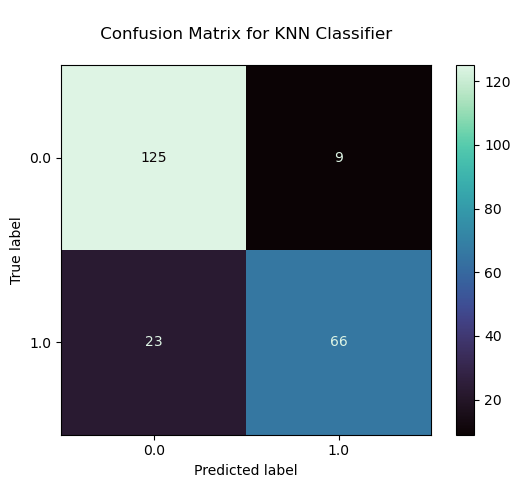

In [288]:
from sklearn import metrics
class_names = data.columns
metrics.plot_confusion_matrix(final_model.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for KNN Classifier \n')
plt.show()

### # Saving the Model

In [289]:
import pickle
pickle.dump(final_model,open('Final_model_Titanic_project','wb'))

In [290]:
model=pickle.load(open('Final_model_Titanic_project','rb'))

In [292]:
prediction = model.predict(x_test)

In [293]:
df=pd.DataFrame()
arr=np.array(y_test)
df['original']=arr
df['predicted']=prediction
df

,original,predicted
0,0.0,0.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
218,1.0,1.0
219,0.0,0.0
220,0.0,0.0
221,0.0,0.0
